# Distant mappings

- Get list of distant mappings
- Plot query positions of mappings, e.g. for distant or close mappings

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
csv_distant = "../results/2022-09-21_amoxicillin_run_vial_14_time_14/distant_mappings.csv"
csv_all = "../results/2022-09-21_amoxicillin_run_vial_14_time_14/suppl_reads_info.csv"
df_distant = pd.read_csv(csv_distant)
df_all = pd.read_csv(csv_all)

# Get list of distant query names
query_names = []
for q in df_distant.itertuples():
    query_names.append(q.query_name)

# Get list of distant queries
distant = []
for q in df_distant.itertuples():
    if q.query_name in query_names:
        distant.append(q)

# Write distant queries to csv
distant_df = pd.DataFrame(distant)
distant_df.to_csv("../results/2022-09-21_amoxicillin_run_vial_14_time_14/distant_mappings_info.csv")

In [7]:
def plot_query_to_ref_distant(df, query_name):
    '''
    Plot positions of query mappings. Reverse mappings are indicated with a dotted line.
    Primary mappings are black, secondary blue, and supplementary red.
    '''
    query_df = df[df["query_name"] == query_name]
    query_shift = np.min(query_df["ref_start"])
    i = 0
    for row in query_df.itertuples():
        color = "k"
        if row.type == "secondary":
            color = "b"
        elif row.type == "supplementary":
            color = "r"
        style = "-" if row.is_forward else ":"
        start = np.min([row.query_start, row.query_end])
        end  = np.max([row.query_start, row.query_end])
        plt.plot([start,end],[i,i],c=color,ls=style,lw=5)
        i -= 1
    plt.title(query_name)
    ax = plt.gca()
    ax.get_yaxis().set_visible(False)
    plt.xlabel("Query position")
    plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/distant_mapping_{0}.png".format(query_name))
    plt.show()

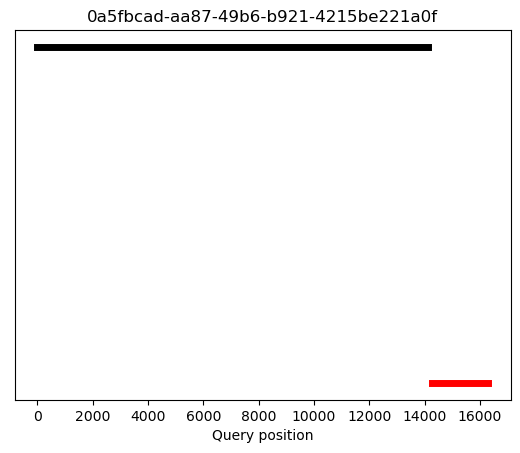

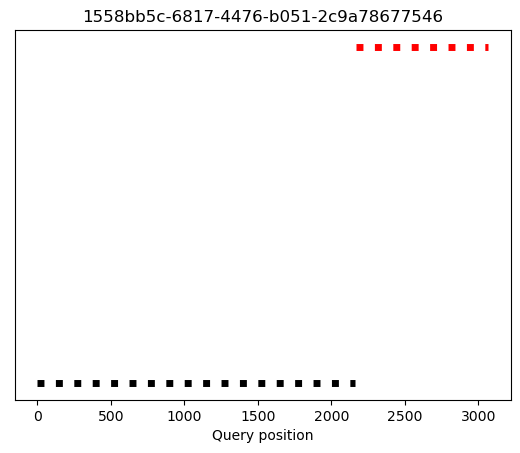

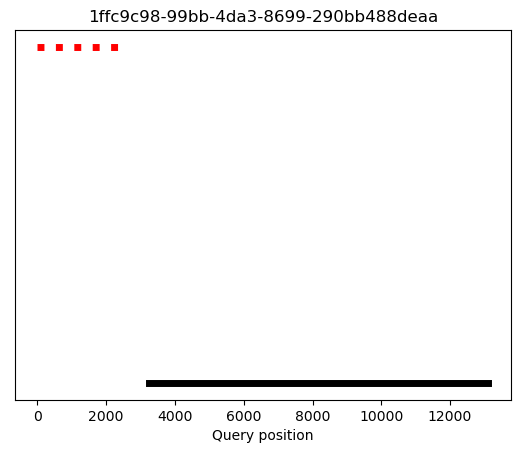

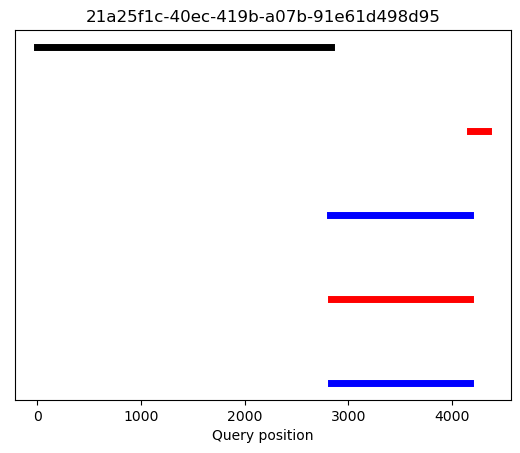

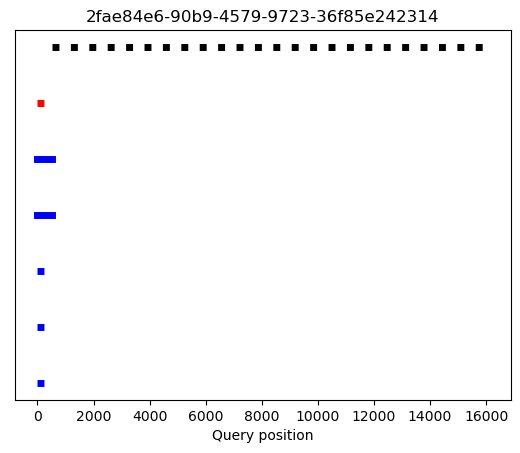

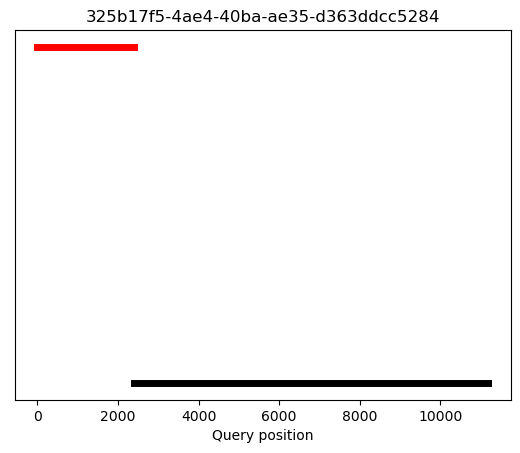

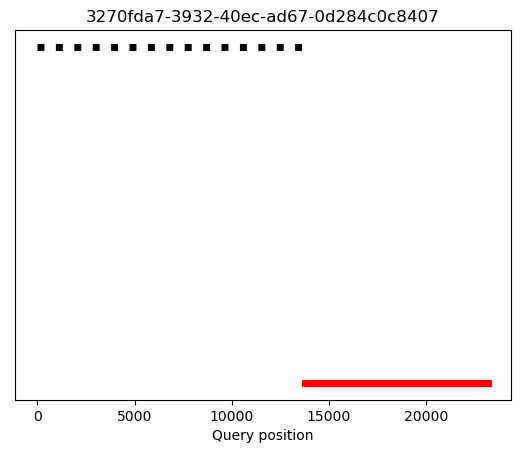

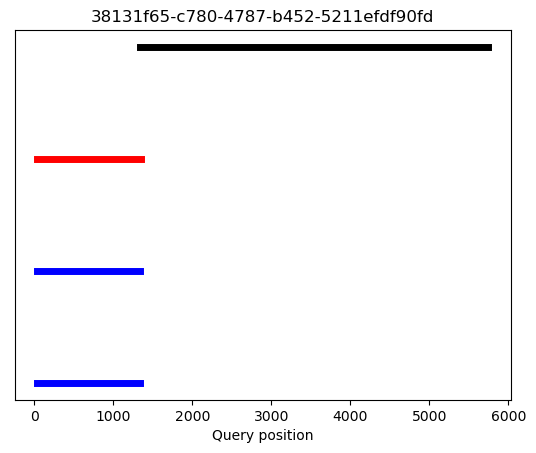

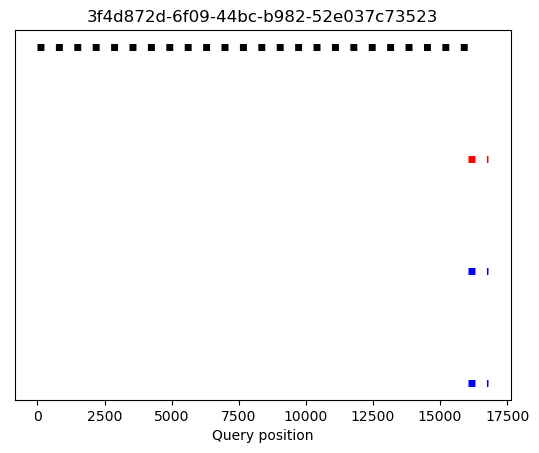

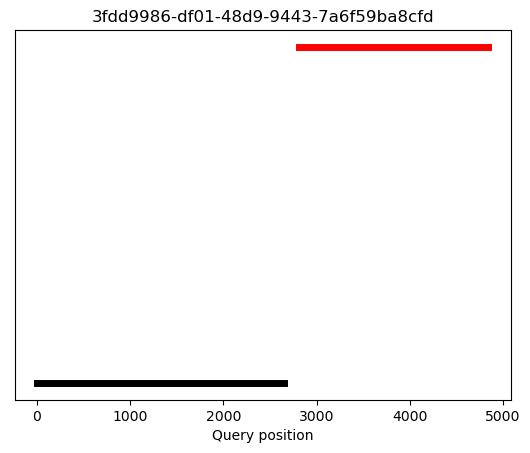

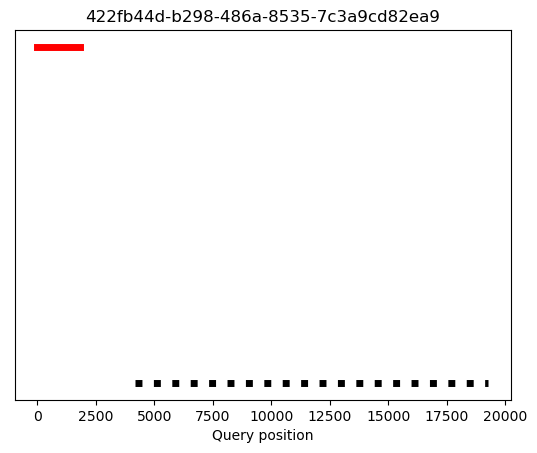

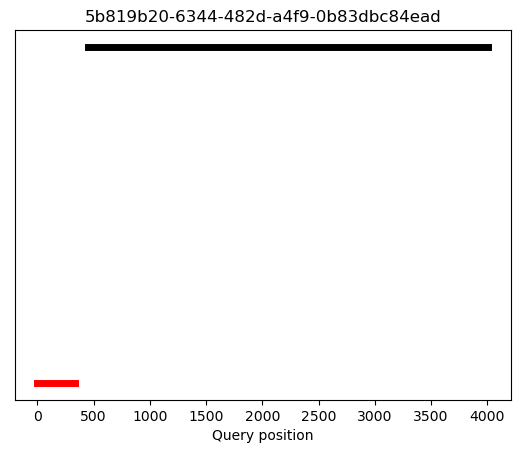

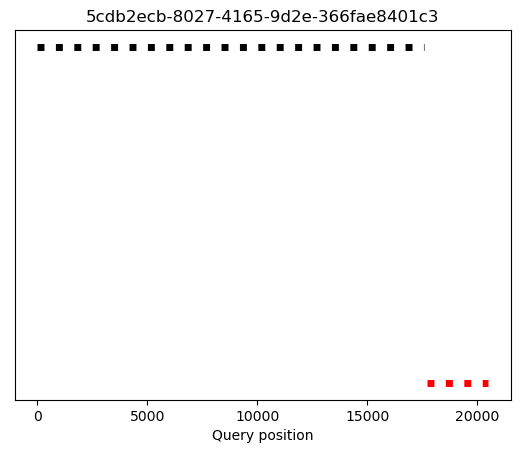

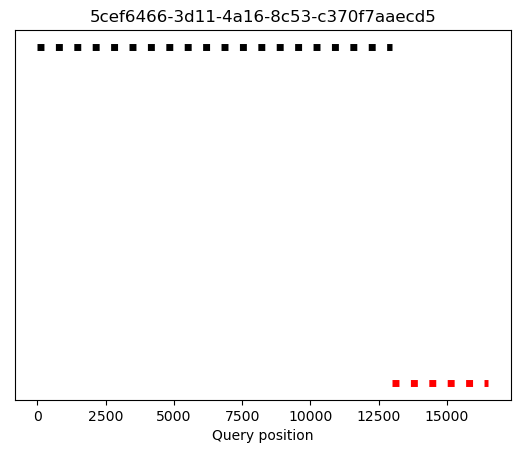

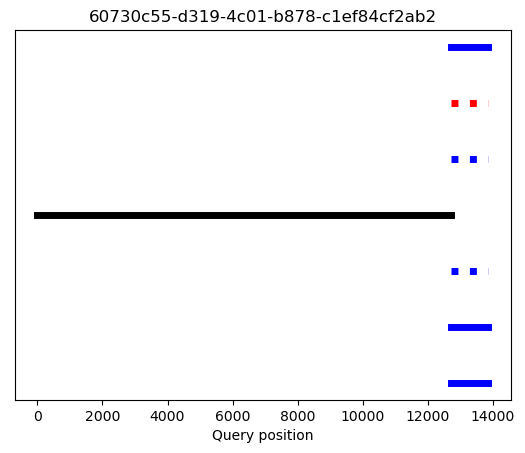

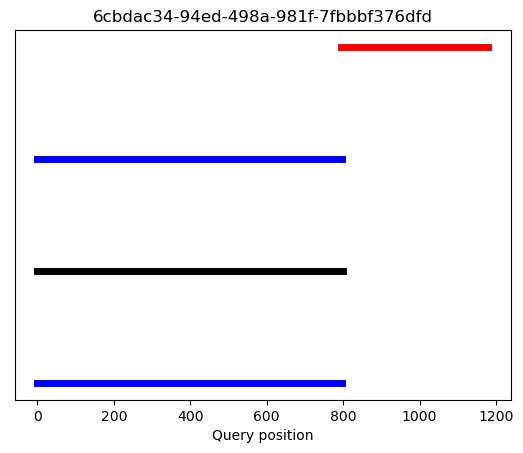

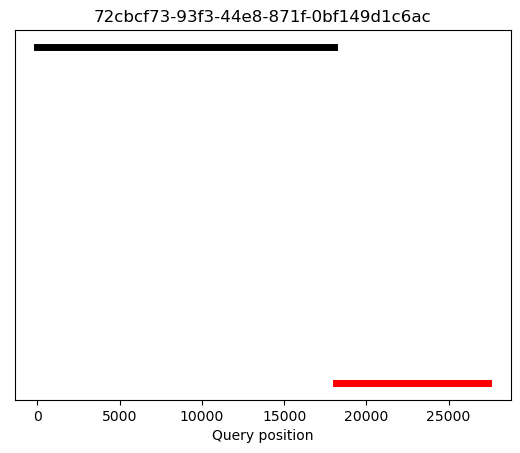

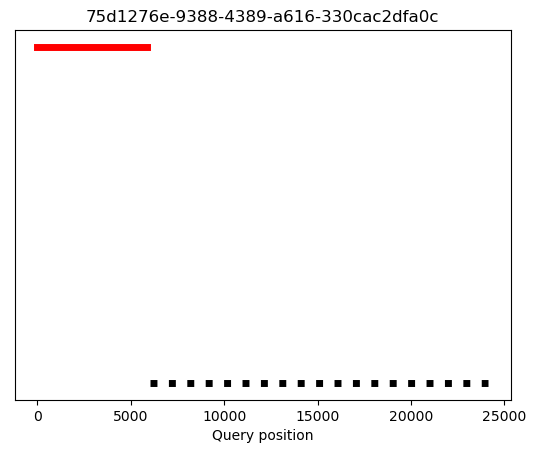

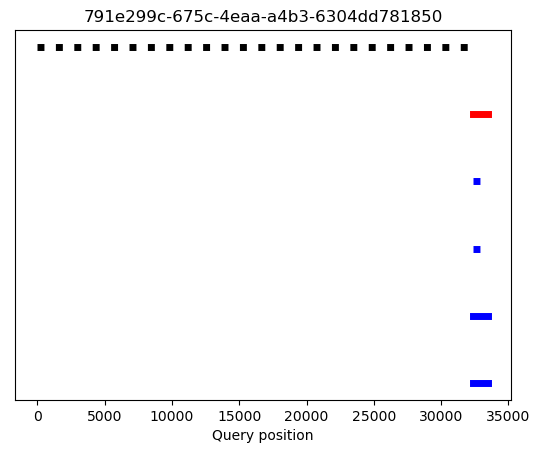

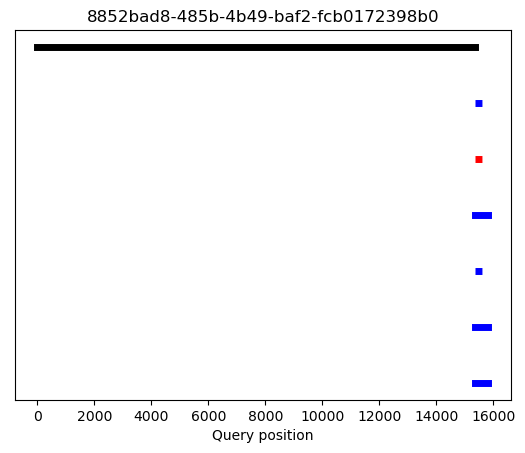

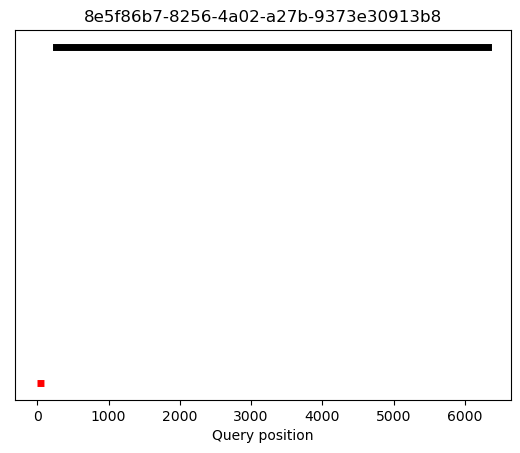

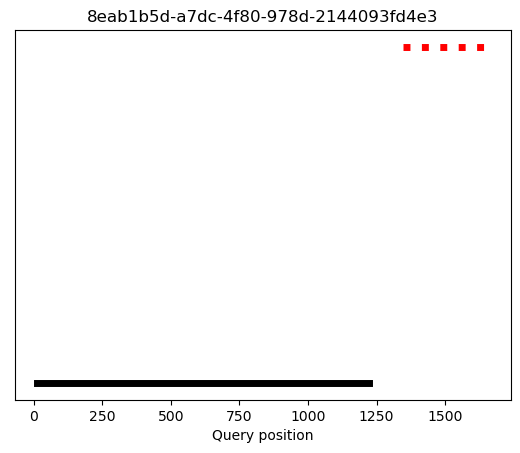

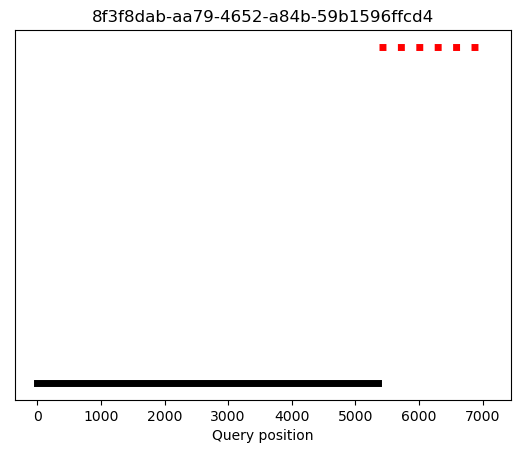

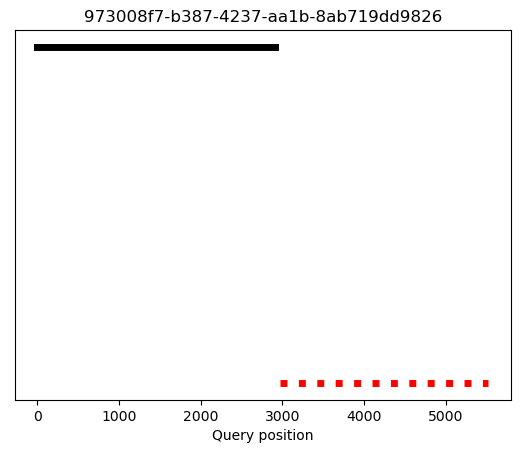

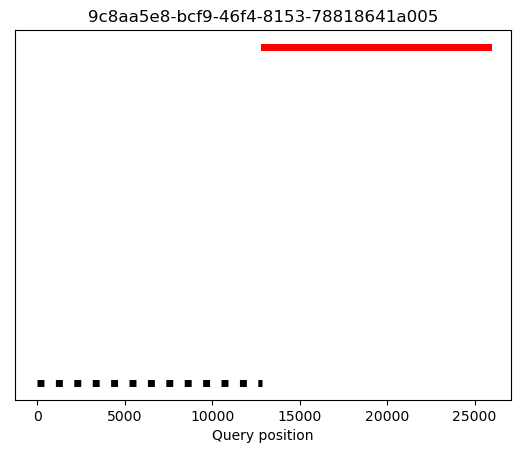

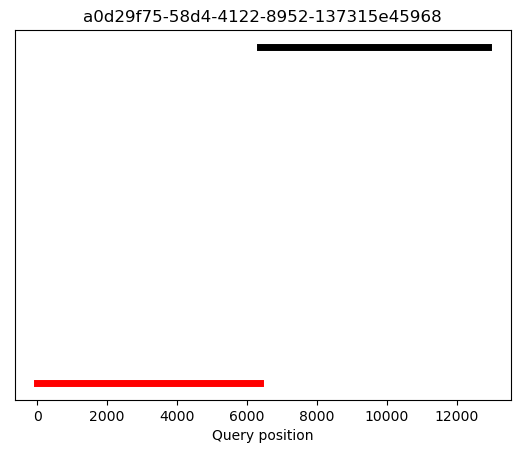

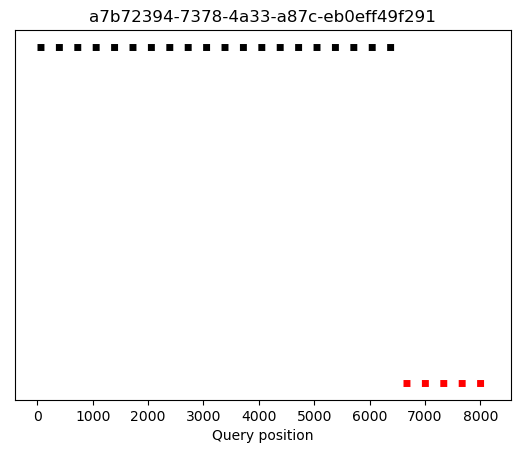

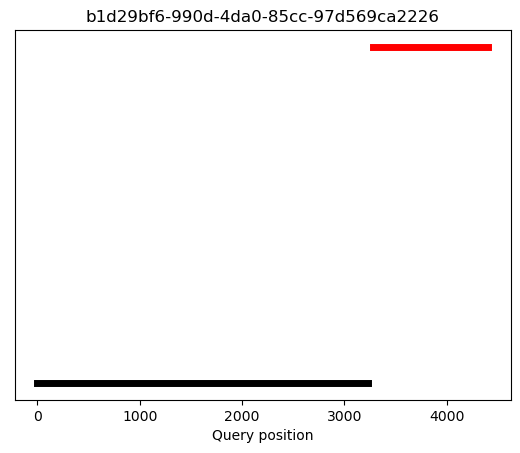

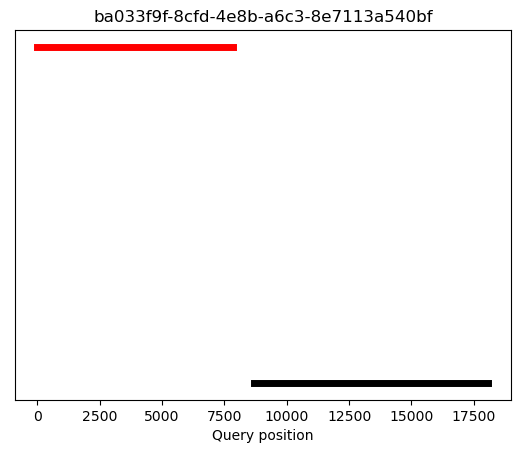

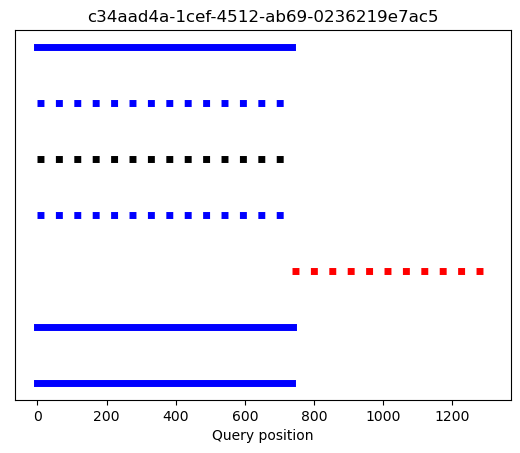

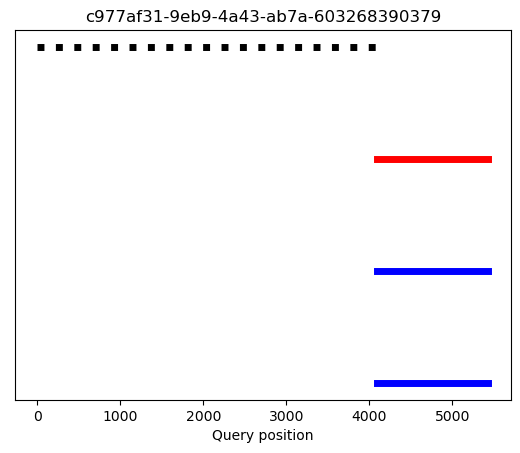

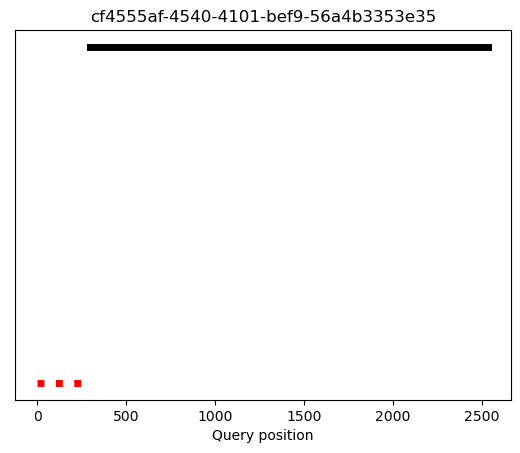

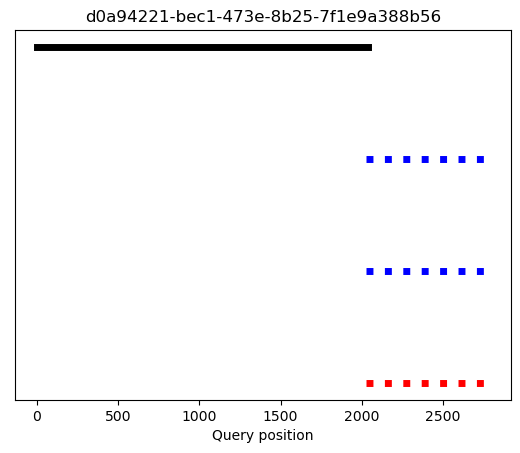

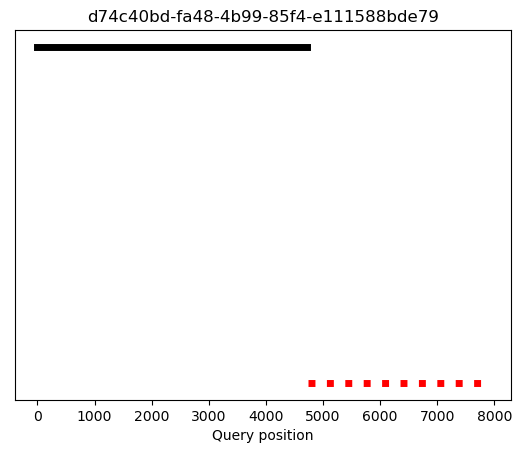

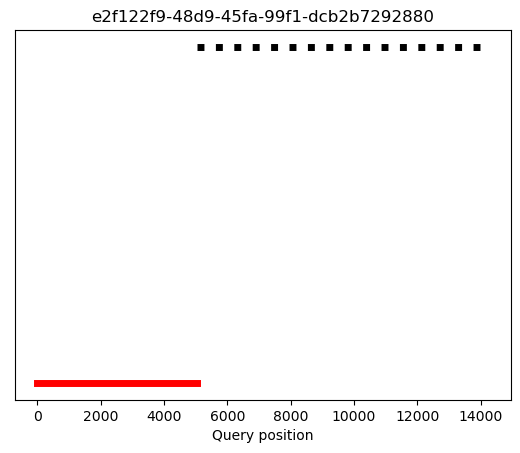

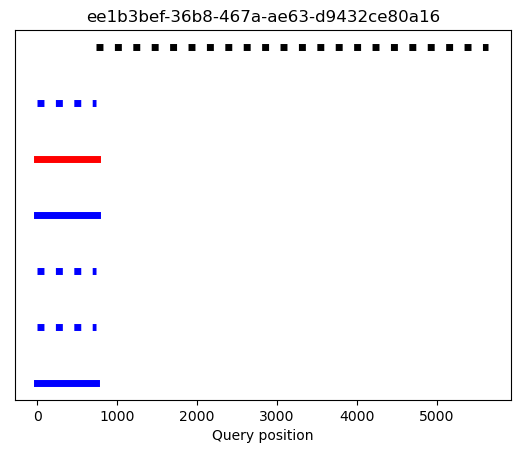

In [8]:
# Plot diagonal
diag = []
for q in df_all.itertuples():
    if q.query_name not in distant: # only reads that don't have distant mapping (but may have close)
        diag.append(q.query_name)
diag = np.unique(diag)

for q in query_names: # change to plot e.g. diagonal
    plot_query_to_ref_distant(df_all, q)